# Tarea 2 Curso Análisis y Limpieza de datos.


#### Profesor responsable: Jorge Alexis Castillo Sepúlveda
#### Alumno: Alejandro Méndez Miranda

## Introducción


### **Los datos utilizados son de nacimientos en Chile entre los años 1990 y 2017**


Según la descripción entrega de los datos:

Estos datos fueron obtenidos por su profesor hace mucho tiempo, pero que, por temas de contingencia, no
es posible obtenerlos de nuevo (la página del DEIS de origen de esos datos ya no es pública), por lo que no
se cuenta con la documentación completa. Sin embargo, los nombres de las columnas se pueden deducir
por lo general, por ejemplo, día_nac refiere al día en que nació, y mes_nac al mes correspondiente, edad_p
corresponde a la edad del padre, y edad_m a la edad de la madre, etc.

Los datos entre 1990 y 1995 están guardados en formato mdb, que refiere a Microsoft Access Database,
que era bien usado por los estadísticos de esa época para gestionar bases de datos. Se pueden guardar en
formato Excel (xls, xlsx) su usted los abre y los guarda en ese formato. Si no usa SO Windows, puede
cargar una consola virtual. Vamos a suponer que esta base de datos de 28 años cerrados es una muestra
suficiente para hacer inferencias sobre los nacimientos de la población en Chile.

## Pregunta 1 : Juntar todos los archivos de todos los años en un solo dataframe global para efectuar los análisis posteriores.

In [1]:
# Carga de librerías
from os import listdir
from os.path import isfile, join
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Pensando en la carga y union de los datos se pensó en un bucle for para realizar esto. Lo primero que se necesita es el path de los archivos ya descargados. Estos archivos no estaban todos en formato .csv por lo cual fueron transformados utilizando Microsfot Excel.


.

In [2]:
mypath = "../Tarea2/nacimientos/nacimientos"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles

['NAC_1990.csv',
 'NAC_1991.csv',
 'NAC_1992.csv',
 'NAC_1993.csv',
 'NAC_1994.csv',
 'NAC_1995.csv',
 'NAC_1996.csv',
 'NAC_1997.csv',
 'NAC_1998.csv',
 'NAC_1999.csv',
 'NAC_2000.csv',
 'NAC_2001.csv',
 'NAC_2002.csv',
 'NAC_2003.csv',
 'NAC_2004.csv',
 'NAC_2005.csv',
 'NAC_2006.csv',
 'NAC_2007.csv',
 'NAC_2008.csv',
 'NAC_2009.csv',
 'NAC_2010.csv',
 'NAC_2011.csv',
 'NAC_2012.csv',
 'NAC_2013.csv',
 'NAC_2014.csv',
 'NAC_2015.csv',
 'NAC_2016.csv',
 'NAC_2017.csv']

Debido a que los nombres obtenidos no contenían el "/" inicial se les agregó como caracter.


.

In [3]:
onlyfiles = ["/" + f for f in onlyfiles]
onlyfiles

['/NAC_1990.csv',
 '/NAC_1991.csv',
 '/NAC_1992.csv',
 '/NAC_1993.csv',
 '/NAC_1994.csv',
 '/NAC_1995.csv',
 '/NAC_1996.csv',
 '/NAC_1997.csv',
 '/NAC_1998.csv',
 '/NAC_1999.csv',
 '/NAC_2000.csv',
 '/NAC_2001.csv',
 '/NAC_2002.csv',
 '/NAC_2003.csv',
 '/NAC_2004.csv',
 '/NAC_2005.csv',
 '/NAC_2006.csv',
 '/NAC_2007.csv',
 '/NAC_2008.csv',
 '/NAC_2009.csv',
 '/NAC_2010.csv',
 '/NAC_2011.csv',
 '/NAC_2012.csv',
 '/NAC_2013.csv',
 '/NAC_2014.csv',
 '/NAC_2015.csv',
 '/NAC_2016.csv',
 '/NAC_2017.csv']

Con la variable path y onlyfiles se puede obtener el path completo a cada archivo. Luego para la unión de los dataframes se pensó en la función .append(), que iría agregando los archivos uno a uno en un bucle for para evitar crear variables que luego no se utilizarían. Pero para partir es necesario tener un dataframe ya cargado y luego realizar el .append(), es por eso que se realizó la carga del primer año como base.

In [4]:
data = pd.read_csv(mypath + onlyfiles[0], sep = ";")
data

,SEXO,DIA_NAC,MES_NAC,ANO_NAC,TIPO_PARTO,TIPO_ATENC,LUGAR_PART,SEMANAS,PESO,TALLA,...,NIVEL_M,CATEG_M,SERV_RES,REG_RES,COMUNA,URB_RURAL,HIJ_VIVOS,HIJ_FALL,HIJ_MORT,HIJ_TOTAL
0,1,1,8,1990,1,2,1,36,2540,47,...,4,0,1,1,201,1,2,0,0,2
1,2,2,8,1990,1,1,1,37,3090,49,...,2,0,1,1,201,1,2,0,0,2
2,2,22,7,1990,1,2,1,40,3100,48,...,4,0,1,1,201,1,2,0,0,2
3,1,3,8,1990,1,2,1,40,4080,53,...,2,0,1,1,201,1,3,0,0,3
4,1,25,7,1990,1,2,1,39,3850,53,...,2,0,1,1,201,1,4,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292140,2,12,8,1990,1,2,1,38,2800,45,...,2,0,10,13,673,1,1,0,0,1
292141,2,7,6,1990,1,2,1,34,2110,43,...,4,0,10,13,673,1,3,0,0,3
292142,2,11,8,1990,1,2,1,33,1806,41,...,2,0,10,13,673,1,2,0,0,2
292143,1,31,10,1990,1,2,1,38,2520,47,...,2,0,10,13,673,1,1,0,0,1


In [5]:
# Se realiza la carga de los dataframes con un bucle for realizando .append al dataframe anteriormente
# cargado
for i in range(1, len(onlyfiles)):
    data2 = pd.read_csv(mypath + onlyfiles[i], sep = ";",encoding='latin-1')
    data = data.append(data2)

C:\Users\Alejo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\Alejo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\Alejo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
#Se obtienen 7.034.428 filas  y 47 columnas en total.
data

,SEXO,DIA_NAC,MES_NAC,ANO_NAC,TIPO_PARTO,TIPO_ATENC,LUGAR_PART,SEMANAS,PESO,TALLA,...,ACTIV_M,OCUPA_M,ACTIV_P,OCUPA_P,ATENC_PART,LOCAL_PART,EST_CIVI_M,URBA_RURAL,ESTAB,NAC_MA
0,1,1,8.0,1990,1,2.0,1.0,36,2540,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,8.0,1990,1,1.0,1.0,37,3090,49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,22,7.0,1990,1,2.0,1.0,40,3100,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,3,8.0,1990,1,2.0,1.0,40,4080,53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,25,7.0,1990,1,2.0,1.0,39,3850,53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219181,2,16,12.0,2017,1,NaN,NaN,37,2735,48,...,1.0,2,1.0,1,1.0,1.0,2.0,1.0,Clinica Indisa,C
219182,2,30,12.0,2017,9,NaN,NaN,99,9999,99,...,9.0,X,9.0,X,9.0,2.0,1.0,1.0,Partos en Domicilio,C
219183,2,15,12.0,2017,1,NaN,NaN,38,3860,50,...,1.0,7,1.0,1,1.0,1.0,1.0,1.0,Clinica Santa Maria,C
219184,2,29,12.0,2017,1,NaN,NaN,39,3370,48,...,9.0,x,1.0,X,2.0,9.0,1.0,1.0,Sin Especificar,


Para realizar un primer vistazo a la información que se utilizará posteriormente se revisarán algunos de sus valores por si existe algo inusual

In [7]:
# Para los análisis posteriores es necesario obtener el nombre de las columnas
data.columns

Index(['SEXO', 'DIA_NAC', 'MES_NAC', 'ANO_NAC', 'TIPO_PARTO', 'TIPO_ATENC',
       'LUGAR_PART', 'SEMANAS', 'PESO', 'TALLA', 'EDAD_P', 'CURSO_P',
       'NIVEL_P', 'CATEG_PA', 'EDAD_M', 'EST_CIV_M', 'CURSO_M', 'NIVEL_M',
       'CATEG_M', 'SERV_RES', 'REG_RES', 'COMUNA', 'URB_RURAL', 'HIJ_VIVOS',
       'HIJ_FALL', 'HIJ_MORT', 'HIJ_TOTAL', 'CONDACT_P', 'GRUPO_P', 'CATEG_P',
       'ECIV_M', 'CONDACT_M', 'GRUPO_M', 'RES_SERV', 'RES_REG', 'AREA',
       'HIJ_NACM', 'ACTIV_M', 'OCUPA_M', 'ACTIV_P', 'OCUPA_P', 'ATENC_PART',
       'LOCAL_PART', 'EST_CIVI_M', 'URBA_RURAL', 'ESTAB', 'NAC_MA'],
      dtype='object')

In [8]:
#Se realiza un conteo de los valores NA de las columnas que se utilizará
data[["SEXO","TALLA","PESO","EDAD_M","EDAD_P","SEMANAS","ESTAB"]].isnull().sum(axis = 0)

SEXO             0
TALLA            0
PESO             0
EDAD_M           0
EDAD_P           2
SEMANAS          0
ESTAB      3186302
dtype: int64

In [9]:
#Se revisan los años de nacimiento
data.ANO_NAC.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

In [10]:
#Se revisa la altura de los infantes
data.TALLA.unique()

array([47, 49, 48, 53, 42, 50, 41, 51, 52, 46, 55, 45, 54, 39, 43, 99, 44,
       40, 57, 56, 36, 32, 64, 59, 37, 30, 60, 25, 38, 35, 31, 58, 34, 33,
       28, 29, 24, 23, 20, 27, 21, 26, 61, 22, 62, 63, 17, 18, 16, 19, 15,
       14, 12,  9,  0, 10], dtype=int64)

In [11]:
#Se revisa la edad de los padres
data.EDAD_P.unique()

array([39., 29., 22., 38., 21., 32., 28., 33., 18., 20., 26., 34., 24.,
       27., 25., 23., 43., 56., 44., 37., 30., 49., 19., 31., 41., 58.,
       36., 42., 35., 45., 50., 46., 17., 48., 40., 54., 47., 64., 65.,
       51., 55., 16., 15., 52., 53., 60., 57., 70., 74., 71., 59., 62.,
       63., 67., 69., 61., 66., 72., 77., 68., 73., 80., 75., 81., 79.,
       76., 14., 83., 86., 78., 82., 98., 87., 85., 89.,  0., 88., 84.,
       92., 96., 94., 93., 90., 91., 95., 13., 99., nan])

In [12]:
#Se revisa la edad de las madres
data.EDAD_M.unique()

array([28, 20, 37, 24, 25, 16, 32, 30, 27, 22, 19, 23, 17, 26, 38, 18, 31,
       33, 29, 21, 34, 36, 35, 41, 39, 15, 45, 40, 44, 14, 43, 13, 42, 58,
       47, 46, 49, 51, 50, 12, 52, 48, 57, 53, 60, 56, 54, 98, 64, 84, 69,
       94, 55, 70,  0, 61, 71, 79, 76, 81, 85, 11, 74, 78, 83, 59, 62, 63,
       91, 99, 10, 92,  3,  2], dtype=int64)

In [13]:
#Existen valores extraños en la edad de la madre especialmente
data[(data.EDAD_M == 3) |(data.EDAD_M == 2)]

,SEXO,DIA_NAC,MES_NAC,ANO_NAC,TIPO_PARTO,TIPO_ATENC,LUGAR_PART,SEMANAS,PESO,TALLA,...,ACTIV_M,OCUPA_M,ACTIV_P,OCUPA_P,ATENC_PART,LOCAL_PART,EST_CIVI_M,URBA_RURAL,ESTAB,NAC_MA
105579,2,20,9.0,2007,1,NaN,NaN,39,2770,48,...,0.0,2,0.0,X,2.0,1.0,1.0,1.0,NaN,NaN
186257,2,14,3.0,2007,1,NaN,NaN,40,3455,51,...,0.0,2,0.0,X,2.0,1.0,2.0,1.0,NaN,NaN


In [14]:
#Existen valores extraños para el valor de talla
data[(data.TALLA > 70) |(data.EDAD_M == 0)]

,SEXO,DIA_NAC,MES_NAC,ANO_NAC,TIPO_PARTO,TIPO_ATENC,LUGAR_PART,SEMANAS,PESO,TALLA,...,ACTIV_M,OCUPA_M,ACTIV_P,OCUPA_P,ATENC_PART,LOCAL_PART,EST_CIVI_M,URBA_RURAL,ESTAB,NAC_MA
140,1,29,7.0,1990,1,1.0,1.0,29,1070,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
350,2,1,7.0,1990,1,1.0,1.0,40,3960,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
388,1,24,3.0,1990,1,1.0,1.0,32,740,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,1,27,6.0,1990,1,2.0,1.0,35,2250,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
438,2,5,6.0,1990,1,2.0,1.0,38,3220,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219060,2,24,1.0,2017,9,NaN,NaN,99,9999,99,...,9.0,X,9.0,X,9.0,9.0,2.0,1.0,Sin Especificar,
219099,2,2,3.0,2017,9,NaN,NaN,99,9999,99,...,9.0,X,9.0,X,9.0,2.0,2.0,1.0,Partos en Domicilio,C
219135,2,15,12.0,2017,9,NaN,NaN,99,9999,99,...,9.0,X,9.0,X,9.0,9.0,1.0,1.0,Sin Especificar,
219136,2,11,6.0,2017,9,NaN,NaN,99,9999,99,...,9.0,X,9.0,X,9.0,9.0,2.0,1.0,Sin Especificar,C


Como se puede observar existen datos extraños, seguramente un error de transcripción y/u obtención. Es por eso que se hace necesario una revisión y eliminación de posibles datos erroneos, dada la gran cantidad de datos no se espera una variación muy significativa en los resultados de todas maneras.

### Eliminación de datos

Según lo conversado en clases, se eliminarán los datos según los cuantiles. Como se busca eliminar datos extremadamente anormales no se es tan restrictivo y se selecciona $2IQR$ sobre $1.5IQR$. Para el caso de las tallas se eliminarán los valores sobre 70 (Tomando como referencia noticias de bebes altos, revisar el nacimiento de este bebé que nació midiendo 67 cm https://www.latercera.com/noticia/bebe-mas-alto-del-mundo-tiene-diez-meses-y-mide-un-metro/) y se eliminará el dato que mide 0 cm por ser un valor relativamente imposible.


In [15]:
#Se realiza el filtro de los outliers por edad
data_outliers = data[["TALLA","PESO","EDAD_M","EDAD_P"]]

Q1 = data_outliers.quantile(0.25)
Q3 = data_outliers.quantile(0.75)
IQR = Q3 - Q1

data = data[~((data_outliers < (Q1 - 2 * IQR))| (data_outliers > (Q3 + 2 * IQR))).any(axis = 1)]

In [16]:
data.EDAD_M.unique()

array([28, 20, 37, 24, 25, 32, 30, 27, 22, 19, 23, 17, 26, 38, 18, 31, 33,
       16, 29, 21, 34, 36, 35, 41, 39, 15, 45, 40, 44, 14, 43, 13, 42, 47,
       46, 50, 12, 49, 48, 52, 51, 11, 10,  3,  2], dtype=int64)

In [17]:
#Se realiza el filtro por tall
data = data[(data.TALLA < 70) & (data.TALLA != 0)]

In [18]:
data

,SEXO,DIA_NAC,MES_NAC,ANO_NAC,TIPO_PARTO,TIPO_ATENC,LUGAR_PART,SEMANAS,PESO,TALLA,...,ACTIV_M,OCUPA_M,ACTIV_P,OCUPA_P,ATENC_PART,LOCAL_PART,EST_CIVI_M,URBA_RURAL,ESTAB,NAC_MA
0,1,1,8.0,1990,1,2.0,1.0,36,2540,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,8.0,1990,1,1.0,1.0,37,3090,49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,22,7.0,1990,1,2.0,1.0,40,3100,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,3,8.0,1990,1,2.0,1.0,40,4080,53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,25,7.0,1990,1,2.0,1.0,39,3850,53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219179,1,15,12.0,2017,1,NaN,NaN,40,3890,53,...,0.0,2,1.0,5,2.0,3.0,1.0,1.0,Otros,C
219181,2,16,12.0,2017,1,NaN,NaN,37,2735,48,...,1.0,2,1.0,1,1.0,1.0,2.0,1.0,Clinica Indisa,C
219183,2,15,12.0,2017,1,NaN,NaN,38,3860,50,...,1.0,7,1.0,1,1.0,1.0,1.0,1.0,Clinica Santa Maria,C
219184,2,29,12.0,2017,1,NaN,NaN,39,3370,48,...,9.0,x,1.0,X,2.0,9.0,1.0,1.0,Sin Especificar,


Se utilizarán estos datos filtrados de ahora en adelante

## Pregunta 2: ¿Cuál es el mes más frecuente de nacimientos en Chile? Comentar al respecto.

In [19]:
# Primero me aseguro de tomar una columna que no contenga NA para luego hacer el groupby
# y realizar el conteo de datos
sum(data.SEXO.isna())

0

In [20]:
#Como count solo cuenta las ocurrencias, necesito una columna cualquiera para que realice el conteo
data[["MES_NAC","SEXO"]].groupby(["MES_NAC"]).count().sort_values("SEXO", ascending = False)

,SEXO
MES_NAC,
1.0,575047
9.0,565252
10.0,562799
3.0,558824
8.0,546821
12.0,546343
7.0,544986
5.0,540848
11.0,536109


In [21]:
# Otro método sería utilizando groupby().size()
data[["MES_NAC","SEXO"]].groupby(["MES_NAC"]).size().sort_values(ascending = False)

MES_NAC
1.0     575047
9.0     565252
10.0    562799
3.0     558824
8.0     546821
12.0    546343
7.0     544986
5.0     540848
11.0    536109
6.0     536022
4.0     531037
2.0     507311
0.0         38
dtype: int64

El mes con más nacimientos es enero, pero en general no hay mucha diferencia entre los valores.

## Pregunta 3: ¿Cuál es el día del año más común en el que la gente en Chile está de cumpleaños?

Para esta labor se utilizará el mes y día de nacimiento para crear un string que sea tipo dd-mm e igualmente que el ejercicio anterior, se realizará un groupby para realizar el conteo

In [22]:
# Utilizando las fechas se crea un string como día-mes
data['FECHA']=data[['DIA_NAC','MES_NAC']].apply(lambda x : '{}-{}'.format(x[0],x[1]), axis=1)
mostbit = data[["FECHA","SEXO"]].groupby(["FECHA"]).count().sort_values("SEXO", ascending = False)
mostbit

,SEXO
FECHA,
27.0-12.0,21387
12.0-9.0,20878
21.0-9.0,20829
26.0-12.0,20795
14.0-9.0,20755
...,...
99.0-1.0,1
99.0-12.0,1
99.0-4.0,1


In [23]:
mostbit.tail(20)

,SEXO
FECHA,
8.0-12.0,13291
15.0-8.0,13130
21.0-5.0,13049
1.0-5.0,12897
18.0-9.0,12887
1.0-11.0,12826
19.0-9.0,12681
25.0-12.0,11117
1.0-1.0,11084


In [24]:
#Los datos que posiblemente son nan (entre datos nan, datos con valor 99, o  fechas imposibles como 30-2)
#son 16, si restamos el total de columnas calculadas menos 16 debería resultar los 
#360 posibles días de nacimiento entre los 366 posibles
376-16

360

Omitiendo la existencia de valores nan (que no pueden ser designados para esta pregunta) y omitiendo la existencia de los valores mal ingresados (que tampoco se pueden designar) la fecha con mayor cantidad de cumpleaños es el 27 de diciembre, lo que nos indica que las madres por razones personales (dentro de lo posible) o razones de disponibilidad (funcionamiento de hospitales por ejemplo) aplazan el nacimiento por las fechas de festividad. 

## Pregunta 4: Calcular covarianza y correlación entre peso y talla a nivel general (tomando toda la base). Luego hacerlo por año. ¿Cambia con el paso de los años?

Antes de realizar el análisis de la covarianza es bueno realizar un gráfico para tener una primera idea de como será el resultado.

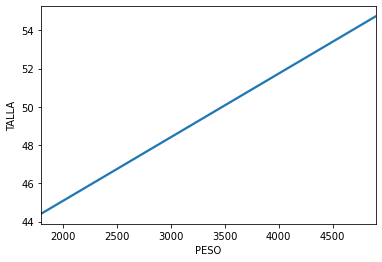

In [25]:
#Realizar el gráfico es muy consumidor de recursos, por eso, y por temas de visualización
#se evitó agregar el scatter plot
sns.regplot(x = "PESO", y = "TALLA", data = data, scatter = False)

Por la pendiente de la recta se esperarán correlaciones y covarianzas positivas

### Covarianza

Para realizar el cálculo de covarianza de todos los datos es simple y solo importa tomar las columnas correctas. En cuanto a por año, para realizarlo de una manera más automática se optó por realizar un groupby por año y luego filtrar filas y columnas con tal de que quedaran las columnas importantes para realizar un plot de los datos.

In [26]:
# Para el cálculo de la covarianza considerando todos los datos la realizo con np.cov()
covarianza = np.cov(data.PESO, data.TALLA)
covarianza

array([[2.25516516e+05, 7.51429569e+02],
       [7.51429569e+02, 4.11206127e+00]])

In [27]:
covarianza[1][0]

751.4295692966681

Se obtiene una covarianza positiva, indicando que mientras sube uno el otro igual, como es de esperar: Si el niño nace más alto es muy posible que tenga un mayor peso.

In [28]:
# Ahora, para obtener la covarianza de cada año entre la TALLA y PESO 
# utilizo dataframe.cov() con los datos agrupados por año
covbyear = data[["ANO_NAC","TALLA","PESO"]].groupby(["ANO_NAC"]).cov()
covbyear.head()

TALLA           PESO
ANO_NAC                                 
1990    TALLA    4.253265     750.245299
        PESO   750.245299  217401.965617
1991    TALLA    4.236316     751.404315
        PESO   751.404315  218808.291063
1992    TALLA    4.269404     752.972397

In [29]:
#Realizando un filtro con iloc se busca obtener solo los datos de covarianza entre peso y talla
covbyear=covbyear.iloc[1::2,0:1]
covbyear

,,TALLA
ANO_NAC,,
1990,PESO,750.245299
1991,PESO,751.404315
1992,PESO,752.972397
1993,PESO,758.122394
1994,PESO,765.679756
1995,PESO,764.661088
1996,PESO,761.036277
1997,PESO,761.594113
1998,PESO,787.127636


In [30]:
# Se elimina el index que contiene los valores "PESO"
covbyear= covbyear.droplevel(level = 1)
covbyear.columns = ["covarianza"]

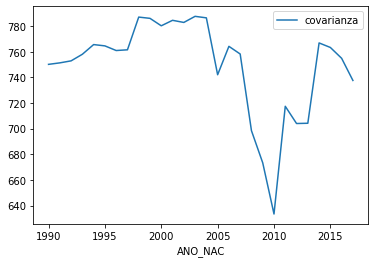

In [31]:
# Se realiza un plot para  ver la tendencia de los datos
covbyear.plot()

Del gráfico se puede desprender que la covarianza se mantiene siempre positiva, aunque variando a través de los años. En el 2010 se ve una gran baja en este valor pero recuperándose en años posteriores. Las razones pueden ser un poco complejas de analizar para es te caso, en especial al ser una medida con unidades de medida combinadas.

### Correlacion

Se realizó el mismo procedimiento que se utilizó para calcular la covarianza

In [32]:
# Para obtener la correlación se utiliza dataframe.corr()
correlacion = data[["TALLA","PESO"]].corr()
correlacion

,TALLA,PESO
TALLA,1.000000,0.780314
PESO,0.780314,1.000000


Se obtiene una correlación positiva, indicando que mientras sube uno el otro igual, como es de esperar: Si el niño nace más alto es muy posible que tenga un mayor peso.

In [33]:
# Para obtener la correlación por año se realiza algo similar que con la covarianza
correlacion = data[["ANO_NAC","TALLA","PESO"]].groupby(["ANO_NAC"]).corr()
correlacion.head()

TALLA      PESO
ANO_NAC                          
1990    TALLA  1.000000  0.780208
        PESO   0.780208  1.000000
1991    TALLA  1.000000  0.780455
        PESO   0.780455  1.000000
1992    TALLA  1.000000  0.773914

In [34]:
#Realizando un filtro con iloc se busca obtener solo los datos de correlación entre peso y talla
correlacion=correlacion.iloc[1::2,0:1]
correlacion

,,TALLA
ANO_NAC,,
1990,PESO,0.780208
1991,PESO,0.780455
1992,PESO,0.773914
1993,PESO,0.774842
1994,PESO,0.778255
1995,PESO,0.782635
1996,PESO,0.780810
1997,PESO,0.781470
1998,PESO,0.789897


In [35]:
correlacion= correlacion.droplevel(level = 1)
correlacion.columns = ["correlacion"]

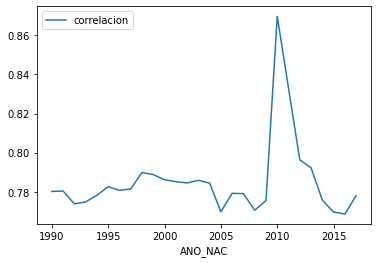

In [36]:
correlacion.plot()

La correlación se mantiene relativamente constante, excepto por el año 2010 nuevamente donde existe un gran aumento. Considerando la disminución de la covarianza en ese mismo periodo, puede que existan bebes con pesos y tallas más cercanas a la media y además con mayor consistencia de que si nacen de talla pequeña el peso igual sea pequeño y viceversa. 


## Pregunta 5: Calcular covarianza y correlación entre la edad del padre y la edad de la madre, a nivel general (tomando toda la base). Luego hacerlo por año. ¿Cambia con el paso de los años?

Los pasos en esta pregunta son similares a los anteriores, por lo cual se parte con un plot de los datos.

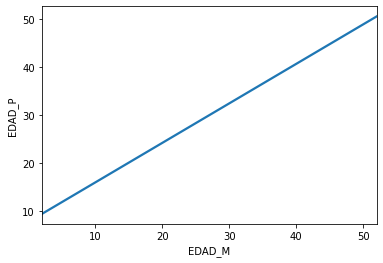

In [37]:
sns.regplot(x = "EDAD_M", y = "EDAD_P", data = data, scatter = False)

Por la pendiente de la recta se esperarán correlaciones y covarianzas positivas

### Covarianza

Se realiza lo mismo que el ejercicio anterior, pero teniendo precaución de filtrar los valores NA existentes

In [38]:
data[["EDAD_M","EDAD_P"]].isnull().sum()

EDAD_M    0
EDAD_P    0
dtype: int64

In [39]:
#Aunque ahora no existan valores NA se deja el código en caso de un uso posterior donde si existan
filtered_data = data[data["EDAD_P"].isnull() == False]

In [40]:
covarianza5 = np.cov(filtered_data.EDAD_M, filtered_data.EDAD_P)
covarianza5

array([[42.67864102, 35.11694354],
       [35.11694354, 53.50085638]])

Existe una covarianza positiva de 35.11694354, indicando que en general las edades de las parejas son parecidas o al menos mientras más edad tiene la madre más edad tiene el padre y visceversa 

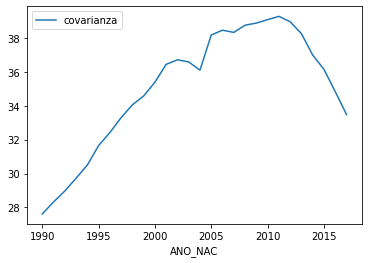

In [41]:
covbyear5 = filtered_data[["ANO_NAC","EDAD_M","EDAD_P"]].groupby(["ANO_NAC"]).cov()
covbyear5 =  covbyear5.iloc[1::2,0:1]
covbyear5 = covbyear5.droplevel(level = 1)
covbyear5.columns = ["covarianza"]
covbyear5.plot()

Para la edad del madre y el padre la covarianza va cambiando su valor por los años. Los menores valores en los primeros años se puede deber a que el tipo de matrimonio era visto de otra manera no existiendo razones para que tuviesen edades parecidas y cercanas a la media, el aumento posterior se mantiene aproximadamente hasta el año 2012 para descender en los años posteriores.

### Correlacion

In [42]:
correlacion = filtered_data[["EDAD_M","EDAD_P"]].corr()
correlacion

,EDAD_M,EDAD_P
EDAD_M,1.000000,0.734905
EDAD_P,0.734905,1.000000


El análisis es similar a la covarianza, en este caso la correlación es 0.734905, indicando que mientras uno aumenta el otro igual.

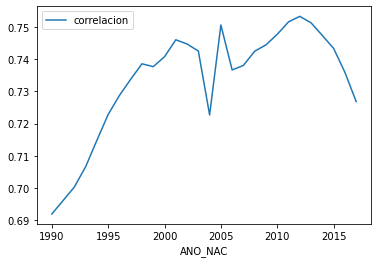

In [43]:
correlacion = filtered_data[["ANO_NAC","EDAD_M","EDAD_P"]].groupby(["ANO_NAC"]).corr()
correlacion=correlacion.iloc[1::2,0:1]
correlacion= correlacion.droplevel(level = 1)
correlacion.columns = ["correlacion"]
correlacion.plot()

La correlación es parecida a la covarianza, las razones sociales solo se pueden suponer por ahora, pero como es de esperar en años pasados era más común ver esa disparidad de edades, mientras que en los últimos años (Pasado el 2013) quizás el tema social no toma tanta importancia y permite una disparidad en las edades de la madre y padre.

## Pregunta 6: Investigue las condiciones para que un bebé cuando nazca se considere “prematuro”, “a término”y “postérmino”. Hacer diagramas de caja para el peso y la talla para estas 3 categorías. Comentar al respecto.

Citando:

https://medlineplus.gov/spanish/ency/article/001562.htm#:~:text=Al%20nacer%2C%20un%20beb%C3%A9%20se,de%2042%20semanas%20de%20gestaci%C3%B3n)

- Prematuro (de menos de 37 semanas de gestación)
- A término (de 37 a 42 semanas de gestación)
- Postérmino o posmaduro (nacido después de 42 semanas de gestación)

In [44]:
# Con la ayuda de  np.where() se crea una columna con el dato si los hijos son prematuros, a termino o postermino.
NACIMIENTO = np.where(data.SEMANAS < 37, "Prematuro",
                     np.where(data.SEMANAS < 43, "A termino", "Postermino"))
NACIMIENTO

array(['Prematuro', 'A termino', 'A termino', ..., 'A termino',
       'A termino', 'A termino'], dtype='<U10')

In [45]:
# Se agrega la información al dataframe original
data = data.assign(NACIMIENTO = NACIMIENTO)

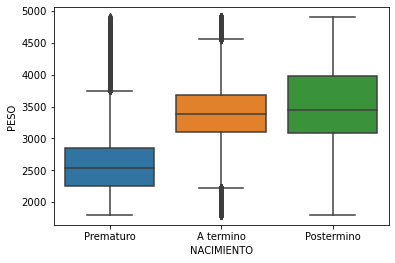

In [46]:
#Finalmente se realiza el plot del peso y nacimiento.....
sns.boxplot(x = "NACIMIENTO", y = "PESO", data = data)

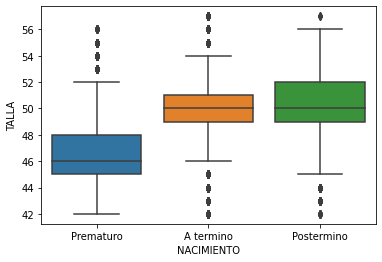

In [47]:
#... y el plot de talla y nacimiento
sns.boxplot(x = "NACIMIENTO", y = "TALLA", data = data)

In [48]:
a=np.count_nonzero(NACIMIENTO == "Prematuro")
b=np.count_nonzero(NACIMIENTO == "A termino")
c=np.count_nonzero(NACIMIENTO == "Postermino")
print("nacieron : {a} Prematuro".format(a = a))
print("nacieron : {a} A termino".format(a = b))
print("nacieron : {a} Postermino".format(a = c))

nacieron : 327581 Prematuro
nacieron : 6219472 A termino
nacieron : 4392 Postermino


La mayoría de los hijos nació a término. Lo que si se puede apreciar que mientras más semanas se demoró en nacer más peso y altura tiene, aunque comparativamente al llegar a término no crece ni sube mucho más de peso (tienen medias muy parecidas a término y postermino), lo que si presenta es una mayor variabilidad de los datos (Cuantiles más amplios) tendiendo a ser más amplia para pesos y tallas más grandes.

## Pregunta 7: Crear una columna llamada “indicador” que valga “1” si el bebé nació en una ambulancia y que valga “2” si el bebé nació en el trayecto (para los datos desde 1996). Caracterice los datos atípicos (outliers) usando el IQR y el primer y tercer cuartil para cada una de estas variables peso, talla, edad del padre y madre, en cada caso con indicador 1 o 2. Comentar al respecto.

### Parte 1: Columna indicador

In [49]:
# Para observar las posibilidades de donde nació se realiza un print al unique de la columna ESTAB
for i in data.ESTAB.unique():
    print(i)

nan
PARTOS EN DOMICILIO
HOSPITAL REGIONAL DE RANCAGUA
HOSPITAL REGIONAL DE TEMUCO
HOSPITAL REGIONAL DE COYHAIQUE
HOSPITAL SAN BORJA ARRIARAN
HOSP.CLINICO DE LA U.CATOLICA
HOSPITAL DR. GUSTAVO FRICKE
HOSPITAL JUAN NOE
CLINICA SAN JOSE
HOSPITAL REGIONAL DE COPIAPO
HOSPITAL SAN JOSE
CLINICA RE@ACA
CLINICA LOS ABETOS
CLINICA DE SALUD INTEGRAL
CLINICA FRANCESA S.A.
HOSPITAL REGIONAL GMO.GRANT BENAVENTE
CLINICA ALEMANA
HOSPITAL CLINICO DE LA FRONTERA
CLINICA JUAN PABLO II
HOSPITAL DE PUERTO MONTT
CLINICA SIERRA BELLA
CLINICA LAS VIOLETAS
CLINICA CENTRAL
HOSPITAL CARLOS VAN BUREN
HOSPITAL ERNESTO TORRES GALDAMEZ
HOSPITAL REGIONAL DE ANTOFAGASTA
HOSPITAL NAVAL ALMIRANTE NEFF
CLINICA DEL MAULE
HOSPITAL DE PUNTA ARENAS
HOSPITAL JOSE JOAQUIN AGUIRRE
HOSPITAL DE VALDIVIA
HOSPITAL FUSAT
HOSPITAL REGIONAL DE TALCA
CLINICA IQUIQUE S.A.
HOSPITAL REGIONAL IQUIQUE
CLINICA ANTOFAGASTA
HOSPITAL MILITAR
SANATORIO ALEMAN
CLINICA LOS ANDES
HOSPITAL JUAN DE DIOS PENI.
CLINICA TEMUCO
CLINICA LINCOYAN
CLINICA M

AMBULANCIA SANTA ANA S/N PALMILLA
Centro de Salud Pichasca
EN AMBULANCIA CAMINO CAPITAN PASTENE A LUMACO
HOSPITAL CLINICO UNIVESIDAD MAYOR DE TEMUCO
HOSPITAL DR. RAFAEL AVARIA -CURANILAHUE
Hospital Clinico del Sur
CLINICA DE LA MUJER CONCEPCION
SAPU   SAN PEDRO
HOSPITAL  DR. RAFAEL AVARIA V.  CURANILAHUE
HOSPITAL DR.RAFAEL AVARIA- CURANILAHUE
CLINICA DE LA MUJER SANATRORIO ALEMAN
HOSPITAL DR. RAFAEL  AVARIA - CURANILAHUE
CLINICA    UNIVERSITARIA
HOSPITAL DR. RAFAEL  AVARIA - C URANILAHUE
CESFAM LOS ALAMOS
CLINICA DIAL VIDA
RODRIGO ROJAS DENEGRI (SAPU)
CLINICA UNIVERSITARIA  HUALPEN
Consultorio Rural O'Higgins
POSTA LLANADA GRANDE
POSTA DE CONTAO
EN AMBULANCIA DE CESFAN NINHUE
HOSPITAL SAN CARLOS MAULLIN
CLINICA DE L A MUJER S.A.
CLINICA DE LA FAMILIA EL LOA
CENTRO DE SALUD DALCAHUE
CLINICA UIVERSITARIA
EN AMBULANCIA CAMINO A OSORNO
CLINICA AVENTISTA LOS ANGELES
Consultorio Rural Rio Negro Hornopiren
CLINICA DE LA MUJER S..A
HOSPITA L TENO
SAPU Pudahuel Estrella
AMBULANCIA DE CONSULTORI

In [50]:
# Al igual que ejercicios anteriores se realiza un np.where() para crear una columna con lo solicitado
# Además se agrega el valor "0" para los valores nulos y los que no son en trayecto o ambulancia
# Finalmente, pensando que "en trayecto" podría ser sinónimo de "en camino" se agregó "CAMINO A"
indicador = np.where(data.ESTAB.isnull(),0,
                     np.where((data.ESTAB.str.contains("TRAYECTO")|data.ESTAB.str.contains("CAMINO A")),2,
                        np.where(data.ESTAB.str.contains("AMBULANCIA"),1,0)))
indicador

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
#Se agrega la columna al dataframe
data = data.assign(indicador = indicador)

In [52]:
#Se crea una nueva  variable para analizar si indicador quedó bien asignado
data_Test = data[["ESTAB","indicador"]]

In [53]:
#Al seleccionar indicador == 1 o que nació en la ambulancia
data_Test[data["indicador"] == 1]

,ESTAB,indicador
43800,AMBULANCIA,1
48195,"AMBULANCIA, ROTONDA EL PAMPINO",1
55469,AMBULANCIA,1
56062,AMBULANCIA SECTOR CONCEPCION,1
56161,AMBULANCIA HOSPITAL REGIONAL CONCEPCION,1
...,...,...
208862,DOLLINCO(AMBULANCIA ) FUTRONO,1
234679,AMBULANCIA,1
48518,AMBULANCIA DE QUILLON,1
77095,AMBULANCIA,1


In [54]:
#Al seleccionar 2 que nació en trayecto
data_Test[data["indicador"] == 2]

,ESTAB,indicador
26883,TRAYECTO HOSPITAL NAVAL TALCAHUANO,2
103401,NACIDO EN AMBULANCIA CAMINO A HOSPITAL REGION,2
122278,TRAYECTO AMBULANCIA HOSPITAL SAN JOSE,2
7482,TRAYECTO DE AMBULANCIA AL HOSPITAL REGIONAL P,2
36461,TRAYECTO HOSPITAL EN AMBULANCIA COMUNA CASTR,2
77763,TRAYECTO AMBULANCIA,2
125320,"AUTO, TRAYECTO AL HOSPITAL",2
142655,TRAYECTO AL HOSPITAL REGIONAL,2
144912,TRAYECTO HOSPITAL COPIAPO,2
150781,EN TRAYECTO HOSPITAL DE LA SERENA,2


In [55]:
#Al seleccionar 0 para otros casos
data_Test[data["indicador"] == 0]

,ESTAB,indicador
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
...,...,...
219179,Otros,0
219181,Clinica Indisa,0
219183,Clinica Santa Maria,0
219184,Sin Especificar,0


In [56]:
#Existe una gran cantidad de NA
sum(data.ESTAB.isna())

3099300

Comparativamente la cantidad de nacimientos en ambulancias y en trayecto son bajos comparado con el total. Además es una de las columnas con más valores NA del cual podria deberse a que es un proceso muy rápido para anotar toda la informacione respecto al nacimiento y no se logra completar en su totalidad.

### Parte 2: Outliers considerando solo subset nacido en ambulancias y en trayecto

In [57]:
#Para analizar los outliers se crearon los rangos intercuartílicos para poder recuperar estos valores
dout = data[(data.indicador == 1) | (data.indicador ==  2)]
Q1 = dout[["PESO","TALLA","EDAD_M","EDAD_P"]].quantile(0.25)
Q3 = dout[["PESO","TALLA","EDAD_M","EDAD_P"]].quantile(0.75)

In [58]:
#Se obtuvo el Q1 para analizar los que están bajo Q1 - 1.5*IQR
Q1

PESO      2950.0
TALLA       48.0
EDAD_M      21.0
EDAD_P      25.0
Name: 0.25, dtype: float64

In [59]:
#Se obtuvo el Q3 para analizar los que están sobre Q3 + 1.5*IQR
Q3

PESO      3550.0
TALLA       50.0
EDAD_M      33.0
EDAD_P      38.0
Name: 0.75, dtype: float64

In [60]:
#Se obtiene el rango interquartilico
IQR = Q3 - Q1
rang_inf = Q1 - 1.5*IQR
rang_sup = Q3 + 1.5*IQR

In [61]:
rang_sup

PESO      4450.0
TALLA       53.0
EDAD_M      51.0
EDAD_P      57.5
dtype: float64

In [62]:
#Nuevamente con el uso de np.where se crea una columna con los outliers en peso
out_peso = np.where(dout.PESO < rang_inf[0],1,
              np.where(dout.PESO > rang_sup[0],2,0))

In [63]:
#Para los outliers en talla
out_talla = np.where(dout.TALLA < rang_inf[1],1,
                 np.where(dout.TALLA > rang_sup[1],2,0))

In [64]:
#Para los outliers en edad de la madre
out_edm = np.where(dout.EDAD_M < rang_inf[2],1,
                 np.where(dout.EDAD_M > rang_sup[2],2,0))

In [65]:
#Para los outliers en edad del padre
out_edp = np.where(dout.EDAD_P < rang_inf[3],1,
                 np.where(dout.EDAD_P > rang_sup[3],2,0))

In [66]:
#Se agregan al dataframe
dout = dout.assign(out_peso = out_peso)
dout = dout.assign(out_talla = out_talla)
dout = dout.assign(out_edm = out_edm)
dout = dout.assign(out_edp = out_edp)
print("Outliers bajo  Q1:{} y sobre Q3:{}".format(len(out_peso[out_peso == 1]), len(out_peso[out_peso == 2])))
print("Outliers bajo  Q1:{} y sobre Q3:{}".format(len(out_talla[out_talla == 1]), len(out_talla[out_talla == 2])))
print("Outliers bajo  Q1:{} y sobre Q3:{}".format(len(out_edm[out_edm == 1]), len(out_edm[out_edm == 2])))
print("Outliers bajo  Q1:{} y sobre Q3:{}".format(len(out_edp[out_edp == 1]), len(out_edp[out_edp == 2])))

Outliers bajo  Q1:6 y sobre Q3:1
Outliers bajo  Q1:7 y sobre Q3:2
Outliers bajo  Q1:0 y sobre Q3:0
Outliers bajo  Q1:0 y sobre Q3:1


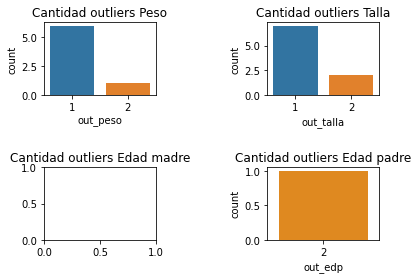

In [67]:
#Se realiza un plot para comparar, aunque se sabe que en la edad de la madre no existe se deja el código expresado
#en caso de posterior uso.
fig, ax = plt.subplots(2, 2)
sns.countplot(x = "out_peso", data = dout[dout["out_peso"] != 0], ax =ax[0,0])
ax[0, 0].set_title("Cantidad outliers Peso")
sns.countplot(x = "out_talla", data = dout[dout["out_talla"] != 0], ax =ax[0,1])
ax[0, 1].set_title('Cantidad outliers Talla')
#sns.countplot(x = "out_edm", data = dout[dout["out_edm"] != 0], ax =ax[1,0])
ax[1, 0].set_title('Cantidad outliers Edad madre')
sns.countplot(x = "out_edp", data = dout[dout["out_edp"] != 0], ax =ax[1,1], color = "darkorange")
ax[1, 1].set_title('Cantidad outliers Edad padre')
plt.subplots_adjust(hspace = 1)
plt.subplots_adjust(wspace = 1)

Para el gráfico 

* 1: Menor a Q1
* 2: Mayor a Q3


La cantidad de outliers es muy pequeña para todos los casos, siendo dificil generalizar respecto a porque se deben.

### Parte 2: Outliers considerando todos los datos como base para determinar si los datos son outliers o no

In [68]:
#Para analizar los outliers se crearon los rangos intercuartílicos para poder recuperar estos valores

Q1 = data[["PESO","TALLA","EDAD_M","EDAD_P"]].quantile(0.25)
Q3 = data[["PESO","TALLA","EDAD_M","EDAD_P"]].quantile(0.75)

In [69]:
#Se obtuvo el Q1 para analizar los que están bajo Q1 - 1.5*IQR
Q1

PESO      3060.0
TALLA       48.0
EDAD_M      22.0
EDAD_P      25.0
Name: 0.25, dtype: float64

In [70]:
#Se obtuvo el Q3 para analizar los que están sobre Q3 + 1.5*IQR
Q3

PESO      3665.0
TALLA       51.0
EDAD_M      32.0
EDAD_P      35.0
Name: 0.75, dtype: float64

In [71]:
#Se obtiene el rango interquartilico
IQR = Q3 - Q1
rang_inf = Q1 - 1.5*IQR
rang_sup = Q3 + 1.5*IQR

In [72]:
rang_sup

PESO      4572.5
TALLA       55.5
EDAD_M      47.0
EDAD_P      50.0
dtype: float64

In [73]:
rang_inf

PESO      2152.5
TALLA       43.5
EDAD_M       7.0
EDAD_P      10.0
dtype: float64

In [74]:
#Nuevamente con el uso de np.where se crea una columna con los outliers en peso
out_peso = np.where(data.PESO < rang_inf[0],1,
              np.where(data.PESO > rang_sup[0],2,0))

In [75]:
#Para los outliers en talla
out_talla = np.where(data.TALLA < rang_inf[1],1,
                 np.where(data.TALLA > rang_sup[1],2,0))

In [76]:
#Para los outliers en edad de la madre
out_edm = np.where(data.EDAD_M < rang_inf[2],1,
                 np.where(data.EDAD_M > rang_sup[2],2,0))

In [77]:
#Para los outliers en edad del padre
out_edp = np.where(data.EDAD_P < rang_inf[3],1,
                 np.where(data.EDAD_P > rang_sup[3],2,0))

In [78]:
#Se agregan al dataframe
data = data.assign(out_peso = out_peso)
data = data.assign(out_talla = out_talla)
data = data.assign(out_edm = out_edm)
data = data.assign(out_edp = out_edp)
print("Outliers peso bajo  Q1:{} y sobre Q3:{}".format(len(out_peso[out_peso == 1]), len(out_peso[out_peso == 2])))
print("Outliers tall bajo  Q1:{} y sobre Q3:{}".format(len(out_talla[out_talla == 1]), len(out_talla[out_talla == 2])))
print("Outliers edad madre bajo  Q1:{} y sobre Q3:{}".format(len(out_edm[out_edm == 1]), len(out_edm[out_edm == 2])))
print("Outliers edad padre bajo  Q1:{} y sobre Q3:{}".format(len(out_edp[out_edp == 1]), len(out_edp[out_edp == 2])))

Outliers peso bajo  Q1:77465 y sobre Q3:33356
Outliers tall bajo  Q1:43456 y sobre Q3:6076
Outliers edad madre bajo  Q1:2 y sobre Q3:743
Outliers edad padre bajo  Q1:0 y sobre Q3:60814


In [79]:
#Se realiza un filtro para seleccionar solo los bebes que nacieron en ambulancia y trayecto
data_filt = data[(data.indicador != 0)]
print("Outliers peso bajo  Q1:{} y sobre Q3:{}".format(sum(data_filt.out_peso ==1), sum(data_filt.out_peso ==2)))
print("Outliers tall bajo  Q1:{} y sobre Q3:{}".format(sum(data_filt.out_talla ==1), sum(data_filt.out_talla ==2)))
print("Outliers edad madre bajo  Q1:{} y sobre Q3:{}".format(sum(data_filt.out_edm ==1), sum(data_filt.out_edm ==2)))
print("Outliers edad padre bajo  Q1:{} y sobre Q3:{}".format(sum(data_filt.out_edp ==1), sum(data_filt.out_edp ==2)))

Outliers peso bajo  Q1:6 y sobre Q3:0
Outliers tall bajo  Q1:5 y sobre Q3:0
Outliers edad madre bajo  Q1:0 y sobre Q3:0
Outliers edad padre bajo  Q1:0 y sobre Q3:3


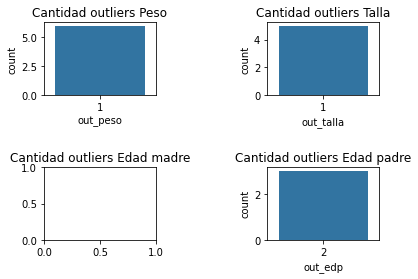

In [80]:
#Se realiza un plot para comparar
fig, ax = plt.subplots(2, 2)
sns.countplot(x = "out_peso", data = data_filt[data_filt["out_peso"] != 0], ax =ax[0,0])
ax[0, 0].set_title("Cantidad outliers Peso")
sns.countplot(x = "out_talla", data = data_filt[data_filt["out_talla"] != 0], ax =ax[0,1])
ax[0, 1].set_title('Cantidad outliers Talla')
#sns.countplot(x = "out_edm", data = data_filt[data_filt["out_edm"] != 0], ax =ax[1,0])
ax[1, 0].set_title('Cantidad outliers Edad madre')
sns.countplot(x = "out_edp", data = data_filt[data_filt["out_edp"] != 0], ax =ax[1,1])
ax[1, 1].set_title('Cantidad outliers Edad padre')
plt.subplots_adjust(hspace = 1)
plt.subplots_adjust(wspace = 1)

Para el gráfico 

* 1: Menor a Q1
* 2: Mayor a Q3


Comparativamente con el análisis anterior, ahora son aun menos outliers comparado con el dataset completo. No existe una relación entre nacer en ambulancia o en el trayecto con el peso, talla o edad de los padres.

In [81]:
data_filt[["TALLA","PESO", "EDAD_M","EDAD_P","out_talla","out_peso","out_edm","out_edp"]][data_filt.out_talla != 0 ]

,TALLA,PESO,EDAD_M,EDAD_P,out_talla,out_peso,out_edm,out_edp
123135,43,2000,18,26.0,1,1,0,0
68210,43,1900,17,19.0,1,1,0,0
117592,43,1870,32,35.0,1,1,0,0
171453,42,1930,24,50.0,1,1,0,0
192296,42,1934,35,43.0,1,1,0,0


In [82]:
data_filt[["TALLA","PESO", "EDAD_M","EDAD_P","out_talla","out_peso","out_edm","out_edp"]][data_filt.out_peso != 0 ]

,TALLA,PESO,EDAD_M,EDAD_P,out_talla,out_peso,out_edm,out_edp
123135,43,2000,18,26.0,1,1,0,0
68210,43,1900,17,19.0,1,1,0,0
38502,44,1970,27,31.0,0,1,0,0
117592,43,1870,32,35.0,1,1,0,0
171453,42,1930,24,50.0,1,1,0,0
192296,42,1934,35,43.0,1,1,0,0


In [83]:
data_filt[["TALLA","PESO", "EDAD_M","EDAD_P","out_talla","out_peso","out_edm","out_edp"]][data_filt.out_edp != 0 ]

,TALLA,PESO,EDAD_M,EDAD_P,out_talla,out_peso,out_edm,out_edp
76093,48,2980,34,51.0,0,0,0,2
97441,52,3963,41,56.0,0,0,0,2
52708,49,2970,26,58.0,0,0,0,2


Finalmente revisando los pocos outliers que tenemos, nos damos cuenta que la mayoría son niños prematuros (mayor cantidad de datos "1" en las columnas out_x), mientras que la edad de los padres encontramos tres que estaban pasados de Q3 - 1.5IQR

## Pregunta 8: Hacer un diagrama de distribución por tipo de establecimiento donde nacen los bebés desde 1996. Notar que los distintos hospitales deben agruparse en una sola categoría (lo mismo corre para las otras categorías). Comentar al respecto.

In [84]:
# Nuevamente se utiliza np.where() para seleccionar y dar nombre según el tipo de establecimiento
#, los establecimientos que más se encontraron fueron:
# Trayecto, Ambulancia, Hospitall, Clinica, Sapu, Consultorio y los que no tenían información o no había como agruparlos
# se les llamó Incierto.

dondefue = np.where(data.ESTAB.isnull(),"INCIERTO",
                     np.where((data.ESTAB.str.contains("TRAYECTO")|data.ESTAB.str.contains("CAMINO A")),"TRAYECTO",
                        np.where(data.ESTAB.str.contains("AMBULANCIA"),"AMBULANCIA",
                                np.where(data.ESTAB.str.contains("HOSPITAL"), "HOSPITAL",
                                        np.where(data.ESTAB.str.contains("CLINICA"), "CLINICA",
                                                np.where(data.ESTAB.str.contains("SAPU"),"SAPU",
                                                        np.where((data.ESTAB.str.contains("CONSULTORIO")|data.ESTAB.str.contains("consultorio")),"CONSULTORIO","EN CASA")))))))
dondefue

array(['INCIERTO', 'INCIERTO', 'INCIERTO', ..., 'EN CASA', 'EN CASA',
       'EN CASA'], dtype='<U11')

In [85]:
#Se agrega la información al dataset
data = data.assign(dondefue = dondefue)


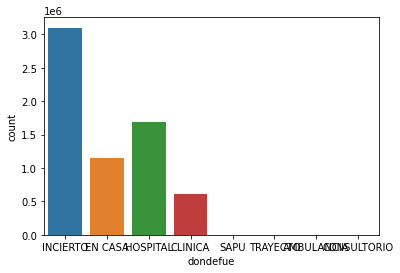

In [86]:
#Se realiza un plot preliminar de todas las categorías, donde se distinguen tres grupos:
#El caso de inciertos, que de por si son una mayoría. En casa, hospital y clinica otro grupo 
#y sapu, consultorio, ambulancia y en el trayecto como grupo final 
#Se realizará un gráfico separado de los dos grupos finales señalados
sns.countplot(x = "dondefue", data = data)

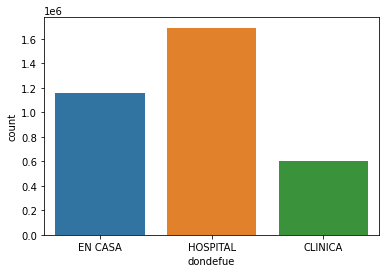

In [87]:
#Plot del groupo 1: En casa, hospital y clinica
sns.countplot(x = "dondefue", data = data[(data.dondefue == "HOSPITAL") |(data.dondefue == "EN CASA")|(data.dondefue == "CLINICA")])

Del gráfico se desprende que la mayoría de niños nació en el hospital. Además sorpresivamente una gran cantidad nació en el hogar. Mientras que en clínicas aunque fue un gran número, no lo es tanto como las ya mencionadas 

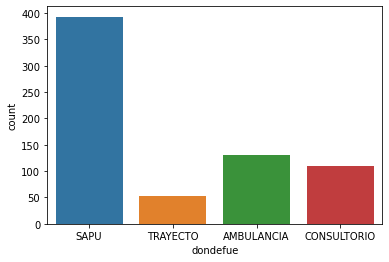

In [88]:
#Plot del groupo 2: Sapu, en trayecto, ambulancia y consultorio
sns.countplot(x = "dondefue", data = data[(data.dondefue != "INCIERTO") & (data.dondefue != "EN CASA") & (data.dondefue != "HOSPITAL") & (data.dondefue != "CLINICA" )])

Aunque comparativamente con el grupo anterior son pocos casos, es destacable que hay gente que de seguro es muy rápido todo el proceso y no alcanzan a llegar al hospital, teniendo que ir al SAPU, quedarse en la ambulancia o en medio del trayecto (Abría que investigar además si la razón es por la lajanía a un hospital u otras razones)

## Pregunta 9: Suponer que los datos de nacimiento (variables continuas) provienen de una distribución normal (desde 1990).Calcular intervalos de confianza para la talla y el peso de los bebés nacidos en Chile. Adicionalmente, calcular el intervalo $[Q_1 -1.5IQR, Q_2 + 1.5IQR]$ para ambas variables talla y peso. Comparar ambos intervalos y comentar.

In [89]:
print(sum(data.PESO.isna()))
print(sum(data.TALLA.isna()))

0
0


In [90]:
#No existen valores NA, entonces no habría problema en tomar la longitud de todos los datos

In [91]:
for i in ["TALLA","PESO"]:
    promedio = data[i].mean()
    desvest = data[i].std()
    n = len(data)
    derecho = 1.96*desvest/np.sqrt(n)
    print("{:.5} : [{}, {}]".format(i,promedio-derecho, promedio+ derecho))

TALLA : [49.59250361932678, 49.595609232112864]
PESO : [3356.1542630430376, 3356.88155149864]


In [92]:
for i in ["TALLA","PESO"]:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    derecho = 1.5*IQR
    print("{:.5} : [{}, {}]".format(i,Q1-derecho, Q3+ derecho))

TALLA : [43.5, 55.5]
PESO : [2152.5, 4572.5]


Para el intervalo de confianza, al existir una enorme cantidad de datos se vuelve muy cerrado, por lo que los cuantiles podrían ser una forma mejor de ver los valores reales, ya que la variabilidad puede ser muy alta. Además los valores medios están en la mitad del intervalo de cuantiles, lo que indica que es probable que sigan una distribución parecida a la normal.

## Pregunta 10: Comentar las características de los bebés nacidos cuando la madre tiene más de 40 años. Hacer lo mismo para cuando la madre tiene menos de 18 años.

Al tener la separación de las madres según el rango de edad entregado, se puede caracterizar en cuanto a la cantidad de estos, la proporción si nacieron prematuros, a termino o postermino, además de sus características de peso y talla.

In [93]:
#Se hace la selección de datos y  se crea una nueva columna según la separación de edades entregado
edades = data[["EDAD_M","PESO","TALLA","NACIMIENTO"]]

In [94]:
#Nuevamente usando np.where se crea una columna que identifique los rangos de edades
esmenor = np.where(edades.EDAD_M > 40, "MAYOR QUE 40",
                  np.where(edades.EDAD_M < 18, "MENOR QUE 18", "ENTRE  18 Y 40"))
esmenor

array(['ENTRE  18 Y 40', 'ENTRE  18 Y 40', 'ENTRE  18 Y 40', ...,
       'ENTRE  18 Y 40', 'ENTRE  18 Y 40', 'ENTRE  18 Y 40'], dtype='<U14')

In [95]:
edades = edades.assign(esmenor = esmenor)

In [96]:
edades

,EDAD_M,PESO,TALLA,NACIMIENTO,esmenor
0,28,2540,47,Prematuro,ENTRE 18 Y 40
1,28,3090,49,A termino,ENTRE 18 Y 40
2,20,3100,48,A termino,ENTRE 18 Y 40
3,37,4080,53,A termino,ENTRE 18 Y 40
4,28,3850,53,A termino,ENTRE 18 Y 40
...,...,...,...,...,...
219179,28,3890,53,A termino,ENTRE 18 Y 40
219181,28,2735,48,A termino,ENTRE 18 Y 40
219183,34,3860,50,A termino,ENTRE 18 Y 40
219184,18,3370,48,A termino,ENTRE 18 Y 40


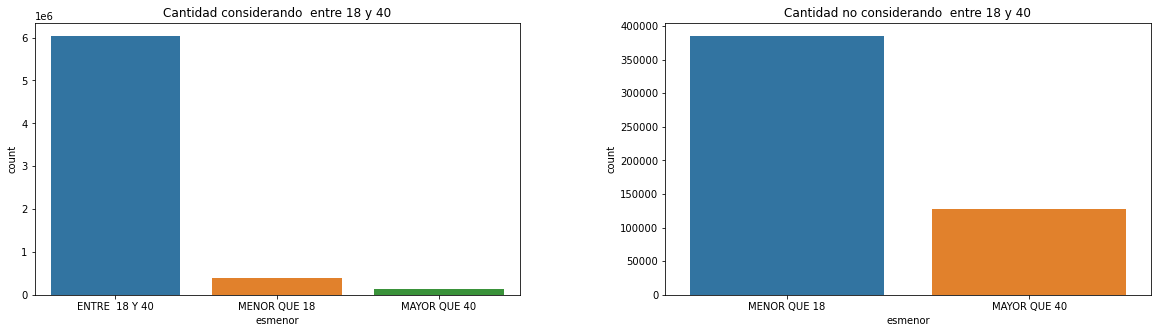

In [97]:
#Se realiza el countplot de los datos según su rango de edad

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.countplot(x = "esmenor", data = edades, ax = ax[0])
ax[0].set_title("Cantidad considerando  entre 18 y 40")
sns.countplot(x = "esmenor", data = edades[edades["esmenor"] != "ENTRE  18 Y 40"], ax = ax[1])
ax[1].set_title('Cantidad no considerando  entre 18 y 40')
plt.subplots_adjust(wspace = 0.3)

Como era de esperarse la mayor cantidad de datos se reparte entre los 18 y 40 años, aunque es sorpresivo encontrar que existe una gran cantidad de embarazos menores de 18 años.

In [98]:
edades.groupby(["esmenor","NACIMIENTO"]).size()

esmenor         NACIMIENTO
ENTRE  18 Y 40  A termino     5739101
                Postermino       4013
                Prematuro      295861
MAYOR QUE 40    A termino      116797
                Postermino         91
                Prematuro       10362
MENOR QUE 18    A termino      363574
                Postermino        288
                Prematuro       21358
dtype: int64

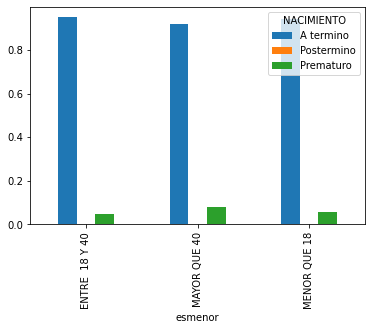

In [99]:
ctab = pd.crosstab(edades["esmenor"], edades["NACIMIENTO"]).apply(lambda r: r/r.sum(), axis=1)
ctab.plot.bar(stacked=False)

In [100]:
#Se imprime el crosstab con las frecuencias sumadas para el rango de edades de la madre
ctab

NACIMIENTO,A termino,Postermino,Prematuro
esmenor,,,
ENTRE 18 Y 40,0.950344,0.000665,0.048992
MAYOR QUE 40,0.917855,0.000715,0.081430
MENOR QUE 18,0.943809,0.000748,0.055444


Para todos los rangos de edad los nacimientos A termino son mucho mayores que postermino o prematuro. Además la mayor proporción de hijos prematuros los tiene el  rango de edad sobre los 40 años, pudiendo haber razones biológicas o quizás un historial de cantidad de hijos que pueda afectar generando estas cifras.

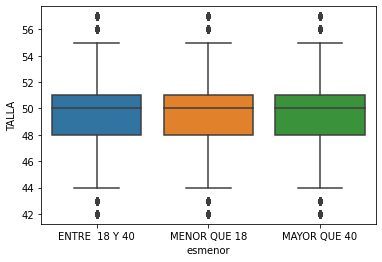

In [101]:
sns.boxplot(x = "esmenor", y = "TALLA", data = edades)

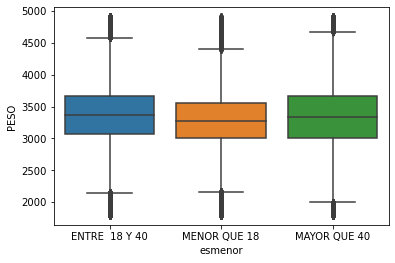

In [102]:
g = sns.boxplot(x = "esmenor", y = "PESO", data = edades)

In [103]:
edades[["TALLA","PESO","esmenor"]].groupby(["esmenor"]).describe()

TALLA                                                     \
                    count       mean       std   min   25%   50%   75%   max   
esmenor                                                                        
ENTRE  18 Y 40  6038975.0  49.610911  2.025025  42.0  48.0  50.0  51.0  57.0   
MAYOR QUE 40     127250.0  49.359010  2.156275  42.0  48.0  50.0  51.0  57.0   
MENOR QUE 18     385220.0  49.407474  2.013630  42.0  48.0  50.0  51.0  57.0   

                     PESO                                                   \
                    count         mean         std     min     25%     50%   
esmenor                                                                      
ENTRE  18 Y 40  6038975.0  3362.944038  474.864680  1800.0  3062.0  3370.0   
MAYOR QUE 40     127250.0  3329.430585  518.913834  1800.0  3000.0  3340.0   
MENOR QUE 18     385220.0  3264.725212  449.513963  1800.0  3000.0  3270.0   

                                
                   75%     max  
esmenor                         
ENTRE  18 Y 40  3670.0  4900.0  
MAYOR QUE 40    3670.0  4900.0  
MENOR QUE 18    3560.0  4900.0

Es sorprendente no visualizar grandes cambios entre la talla y peso del hijo a traves de los rangos de edades (Boxplot muy similares con valores medios muy parecidos). Solo se puede observar cambios en la variabilidad de los datos de peso,  pero no muy significativas.